In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

In [1]:
from wordcloud import WordCloud

In [3]:
pd.set_option('display.max_rows', 10)

In [4]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [45]:
pd.__version__

'1.2.1'

In [43]:
sns.__version__

'0.11.1'

In [47]:
import matplotlib

In [48]:
matplotlib.__version__

'3.3.4'

In [41]:
import nltk
nltk.__version__

'3.5'

In [4]:
import string

In [5]:
from collections import Counter

In [6]:
q_df = pd.read_csv('data.csv', header = None, names = ['1p','2p','3p','4p','5p','6p','7p'])

In [7]:
q_df

,1p,2p,3p,4p,5p,6p,7p
0,"Well, covid-19 pandemic, in my opinion effecte...",The covid-19 has had a lot of effects in the s...,Regarding maritime market we faced big problem...,I believe that it has affected the overall shi...,Covid-19 affects shipping industry in many way...,The shipping industry is globally affected by ...,The shipping industry have been affected in ve...
1,"Well, I can speak better for my department vie...",Due to the fact that the situation is changing...,"Personally, I work from home and I am doing al...","I belong to the crew department, we are respon...",Operation and disbursements accounts dept has ...,"In general, as, I work in the operation depar...","Of course, covid-19 has affected my department..."
2,As far as I know at the moment things are get...,Seafarers are facing now one of the biggest pr...,The seafarers are far away from their families...,The seafarers are facing various difficulties ...,"It is not under my responsibility, but for sur...",First of all is very difficult to do the crew ...,Many problems are seafarers facing. First of a...
3,"We are trying to be updated about anything, we...",The most important thing that the company does...,We tried to solve the problems with courier de...,The company is working to limit those difficul...,Our company is totally aware of this situation...,"I work in the operation department as I said, ...",We are not allowed to do crew changes because ...
4,I think that this is answered from our previou...,"As mentioned, before they are many ports that ...",Covid-19 has decreased the changes of crew. S...,The covd-19 effected crew changes 100% because...,It is difficult as they need proper port to em...,Crew changes now are the biggest the biggest i...,I will give you an example. We had a seafarer ...
5,"Let me thing about it a little bit. Well, if y...","Of course, covid-19 effected the crew changes ...","Yes, they follow in the shipping area, it is n...",I think that international regulation influen...,"Yes, some cargoes are not available as there i...",I am not very familiar with the regulations so...,I believe that regulations and the measures in...
6,"I have not think about it, but I think the com...",I don’t think that they could have done anythi...,They are already protected. Shipping spends a ...,In the last month I had to provide emotional ...,I think that our company have taken the correc...,In my opinion and to the best of my knowledge ...,I don’t think that we could do anything bette...


### Text processing

In [8]:
# remove punctuation
no_pun = q_df.applymap(lambda x: x.translate(str.maketrans('', '', '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~’')))

In [9]:
# tokenize

In [9]:
tokenized_q_df = no_pun.applymap(lambda x: word_tokenize(x))

In [10]:
# lowercase

In [10]:
tokenized_q_df = tokenized_q_df.applymap(lambda x: list(map(str.lower, x)))

In [11]:
# remove stop words
stop_words = set(stopwords.words('english'))

In [12]:
stop_words.update(['many','every','dont','since','also','due'])

In [13]:
tokenized_q_df_no_stop_words = tokenized_q_df.applymap(lambda x: [word for word in x if not word in stop_words])

In [14]:
# stemming words
lc = LancasterStemmer()

In [15]:
stemmed_tokenized_q_df = tokenized_q_df_no_stop_words.applymap(lambda x: [lc.stem(word) for word in x])

In [16]:
stemmed_tokenized_q_df

,1p,2p,3p,4p,5p,6p,7p
0,"[wel, covid19, pandem, opin, effect, most, cre...","[covid19, lot, effect, ship, industry, lock, d...","[regard, maritim, market, fac, big, problem, c...","[believ, affect, overal, ship, industry, cre, ...","[covid19, affect, ship, industry, way, first, ...","[ship, industry, glob, affect, covid19, begin,...","[ship, industry, affect, much, spec, crew, cha..."
1,"[wel, speak, bet, depart, view, crew, depart, ...","[fact, situ, chang, day, tim, inform, mean, wo...","[person, work, hom, work, form, pc, follow, ca...","[belong, crew, depart, respons, crew, chang, o...","[op, disburs, account, dept, affect, much, aff...","[gen, work, op, depart, everyth, difficult, ca...","[cours, covid19, affect, depart, issu, occ, cr..."
2,"[far, know, mom, thing, get, smooth, flight, f...","[seaf, fac, on, biggest, problem, ev, ex, ship...","[seaf, far, away, famy, cant, reach, covid19, ...","[seaf, fac, vary, difficul, mom, point, recrui...","[respons, sur, fac, lot, difficul, embark, dis...","[first, difficult, crew, chang, mean, seaf, sa...","[problem, seaf, fac, first, depress, observ, i..."
3,"[try, upd, anyth, read, day, new, reg, guideli...","[import, thing, company, const, inform, everyt...","[tri, solv, problem, coury, delivery, us, airl...","[company, work, limit, difficul, problem, much...","[company, tot, aw, situ, tak, relev, meas, str...","[work, op, depart, said, regard, op, mat, try,...","[allow, crew, chang, lot, port, clos, cal, por..."
4,"[think, answ, prevy, dict]","[ment, port, allow, seaf, disembark, theref, a...","[covid19, decreas, chang, crew, crew, becom, r...","[covd19, effect, crew, chang, 100, effect, por...","[difficult, nee, prop, port, embark, disembark...","[crew, chang, biggest, biggest, issu, ship, co...","[giv, exampl, seaf, koh, sichang, show, sympto..."
5,"[let, thing, littl, bit, wel, think, world, he...","[cours, covid19, effect, crew, chang, believ, ...","[ye, follow, ship, are, op, lik, industry, shi...","[think, intern, reg, influ, sign, seaboard, tr...","[ye, cargo, avail, demand, difficult, chart, b...","[famili, reg, think, answ, prop, read, try, fo...","[believ, reg, meas, influ, trad, main, crew, c..."
6,"[think, think, company, much, mean, lot, covid...","[think, could, don, anyth, diff, someth, expec...","[already, protect, ship, spend, lot, money, ma...","[last, mon, provid, emot, support, whol, crew,...","[think, company, tak, correct, decid, regard, ...","[opin, best, knowledg, tak, step, toward, saf,...","[think, could, anyth, bet, top, situ, commun, ..."


In [17]:
for col in stemmed_tokenized_q_df.columns:
    stemmed_tokenized_q_df['count_q'+'_'+col] = stemmed_tokenized_q_df[col].apply(lambda x: Counter(x))
    
stemmed_tokenized_q_df['word_counts_totals'] = stemmed_tokenized_q_df.iloc[:,7:].sum(axis='columns')

In [18]:
total_word_counts_stem = pd.Series(stemmed_tokenized_q_df['word_counts_totals'].sum())

In [19]:
sns.set_theme(style="darkgrid")

In [45]:
total_word_counts_stem.sort_values(ascending=False)[:20]

crew       68
chang      52
vessel     50
seaf       45
port       39
           ..
onboard    22
affect     20
allow      20
work       19
much       16
Length: 20, dtype: int64

### Word frequencies

In [74]:
from PIL import Image

In [89]:
anchor_mask = np.array(Image.open('anchor.png'))

In [96]:
wordcloud = WordCloud(max_font_size=None, background_color="white", mask=anchor_mask, max_words=400).generate_from_frequencies(total_word_counts_stem)
contour_color='steelblue'

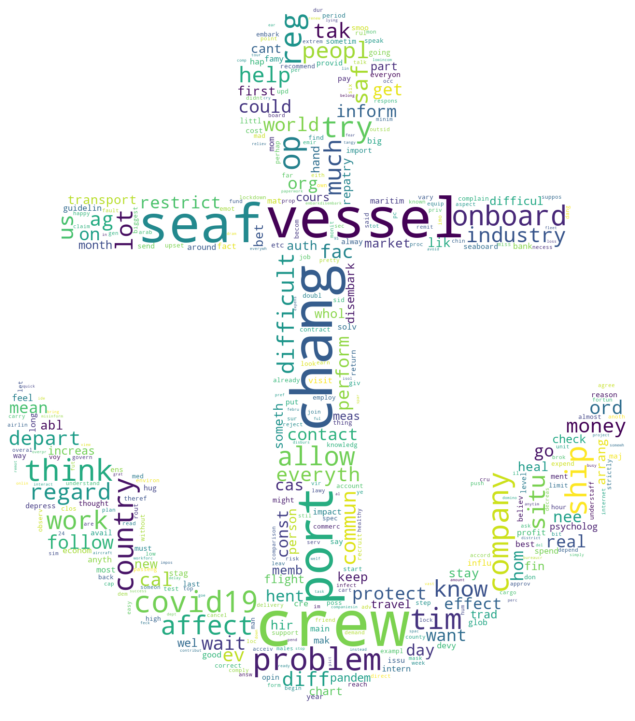

In [97]:
plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

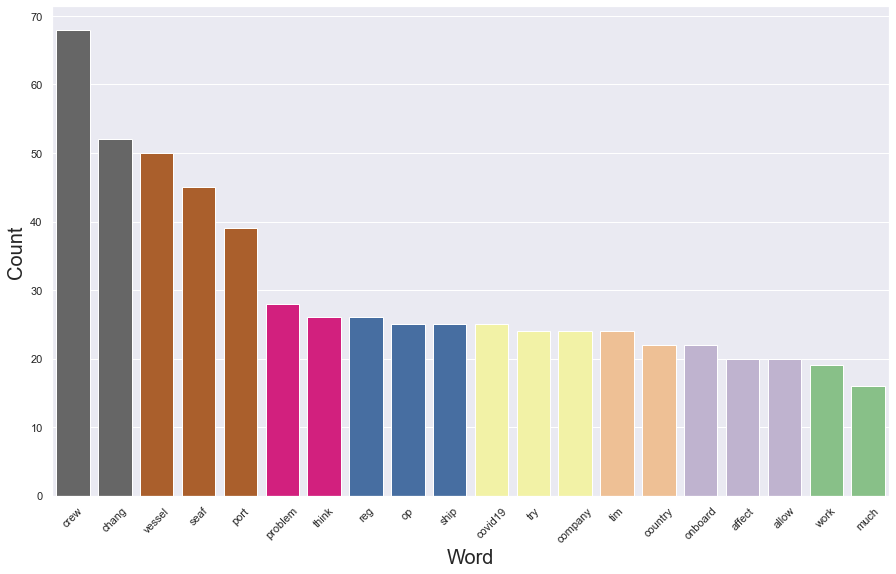

In [125]:
fig, axes = plt.subplots(figsize=(15,9))
sns.barplot(x = total_word_counts_stem.sort_values(ascending=False)[:20].index, y = total_word_counts_stem.sort_values(ascending=False)[:20].values, palette = 'Accent_r')
axes.tick_params(axis='x', labelrotation=45)
axes.set_ylabel('Count', fontsize='20')
axes.set_xlabel('Word', fontsize='20');

#### Word frequencies by question

In [21]:
stemmed_tokenized_q_df['Question'] = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7']

In [22]:
pd.Series(stemmed_tokenized_q_df['word_counts_totals'][1], name = 'n').sort_values(ascending=False)

crew       10
chang       9
op          7
depart      7
work        6
           ..
last        1
increas     1
hent        1
anytim      1
extr        1
Name: n, Length: 185, dtype: int64

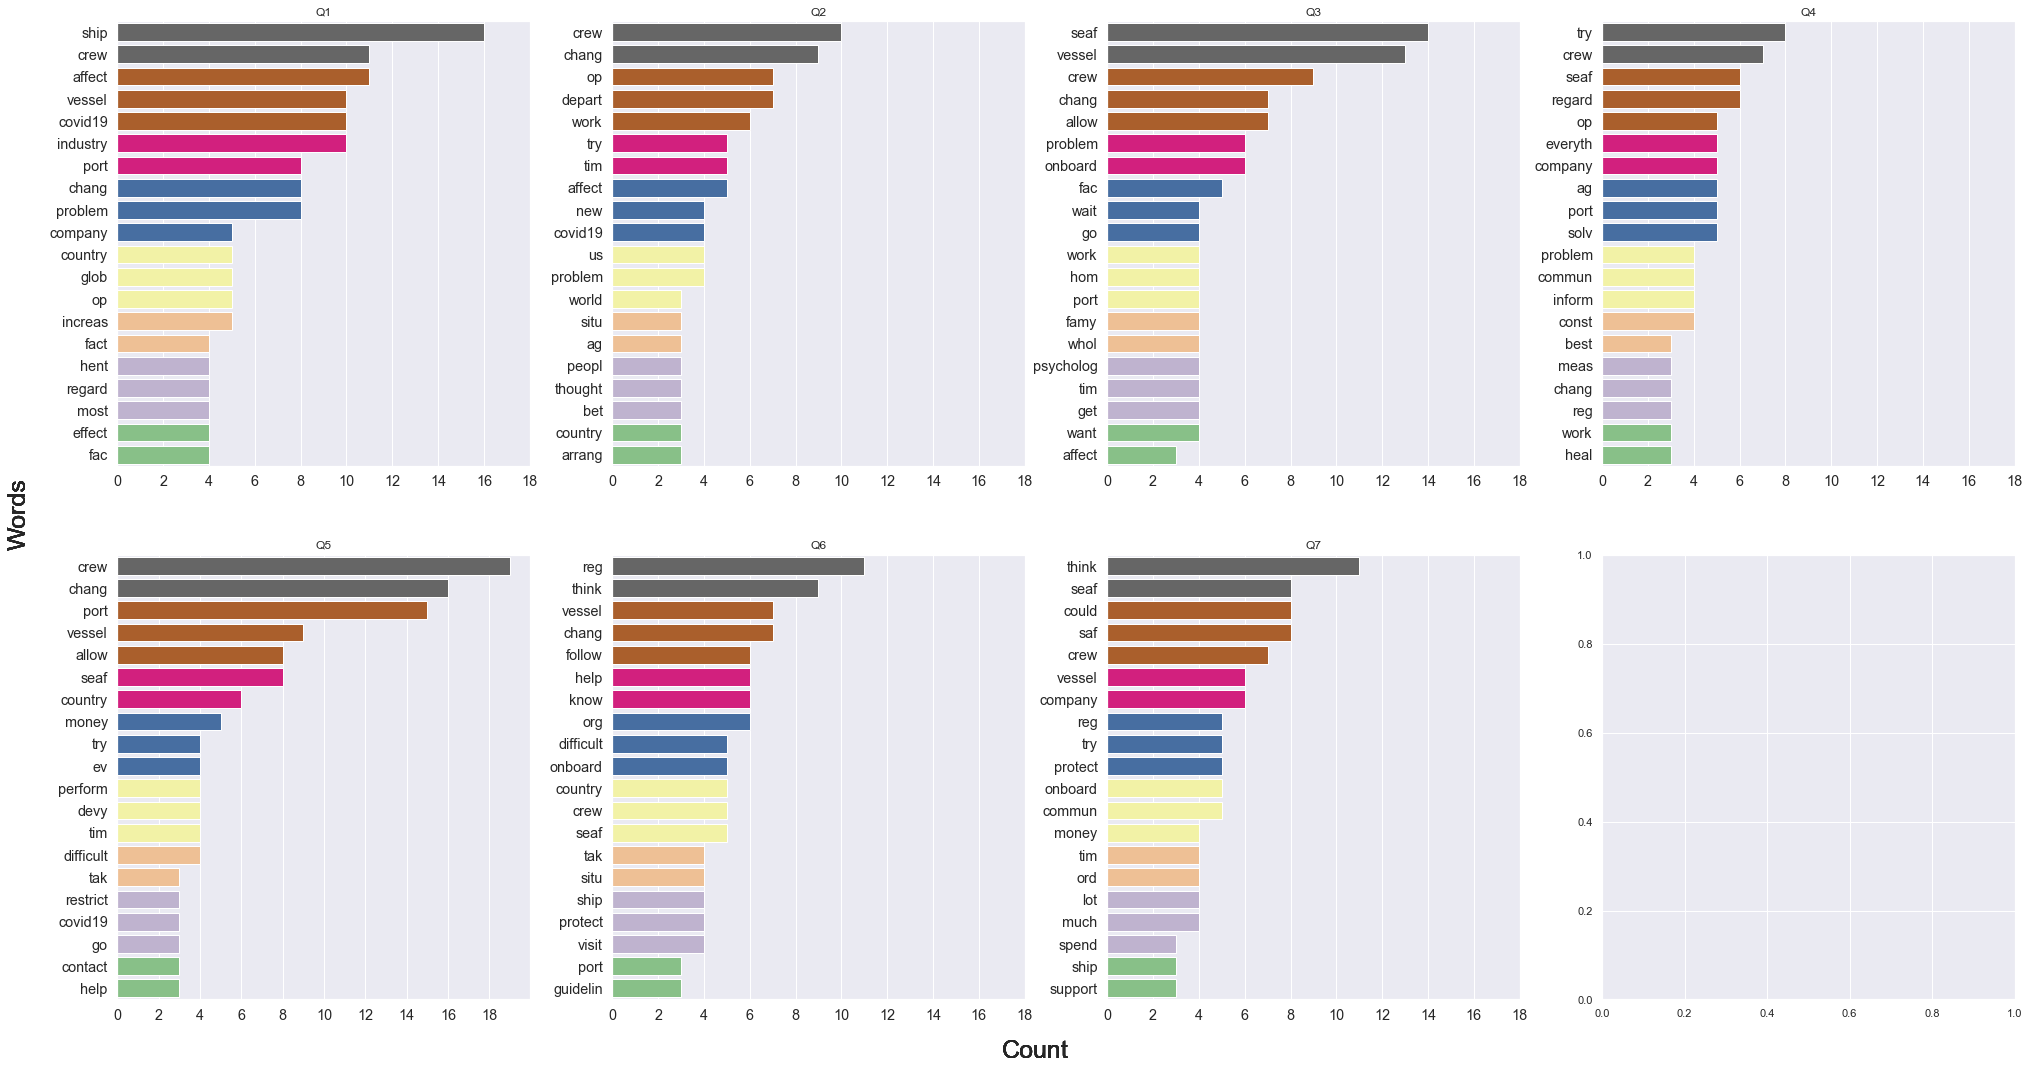

In [120]:
ticks = [x for x in range(0,20,2)]
fig, axes = plt.subplots(2,4,figsize=(34,18))

for i, ax in zip(range(0,7), axes.flat):
    s = pd.Series(stemmed_tokenized_q_df['word_counts_totals'][i]).sort_values(ascending=False)[:20]
    sns.barplot(y = s.index, x = s.values, palette = 'Accent_r', ax=ax)
    ax.tick_params(axis='x', labelsize='large')
    ax.tick_params(axis='y', labelsize='large')
    ax.set_xticks(ticks)
    ax.title.set_text(stemmed_tokenized_q_df['Question'][i])
    fig.text(0.5, 0.08, 'Count', ha='center', fontsize=25)
    fig.text(0.08, 0.5, 'Words', va='center', rotation='vertical', fontsize=25)

#### Word frequencies by participant

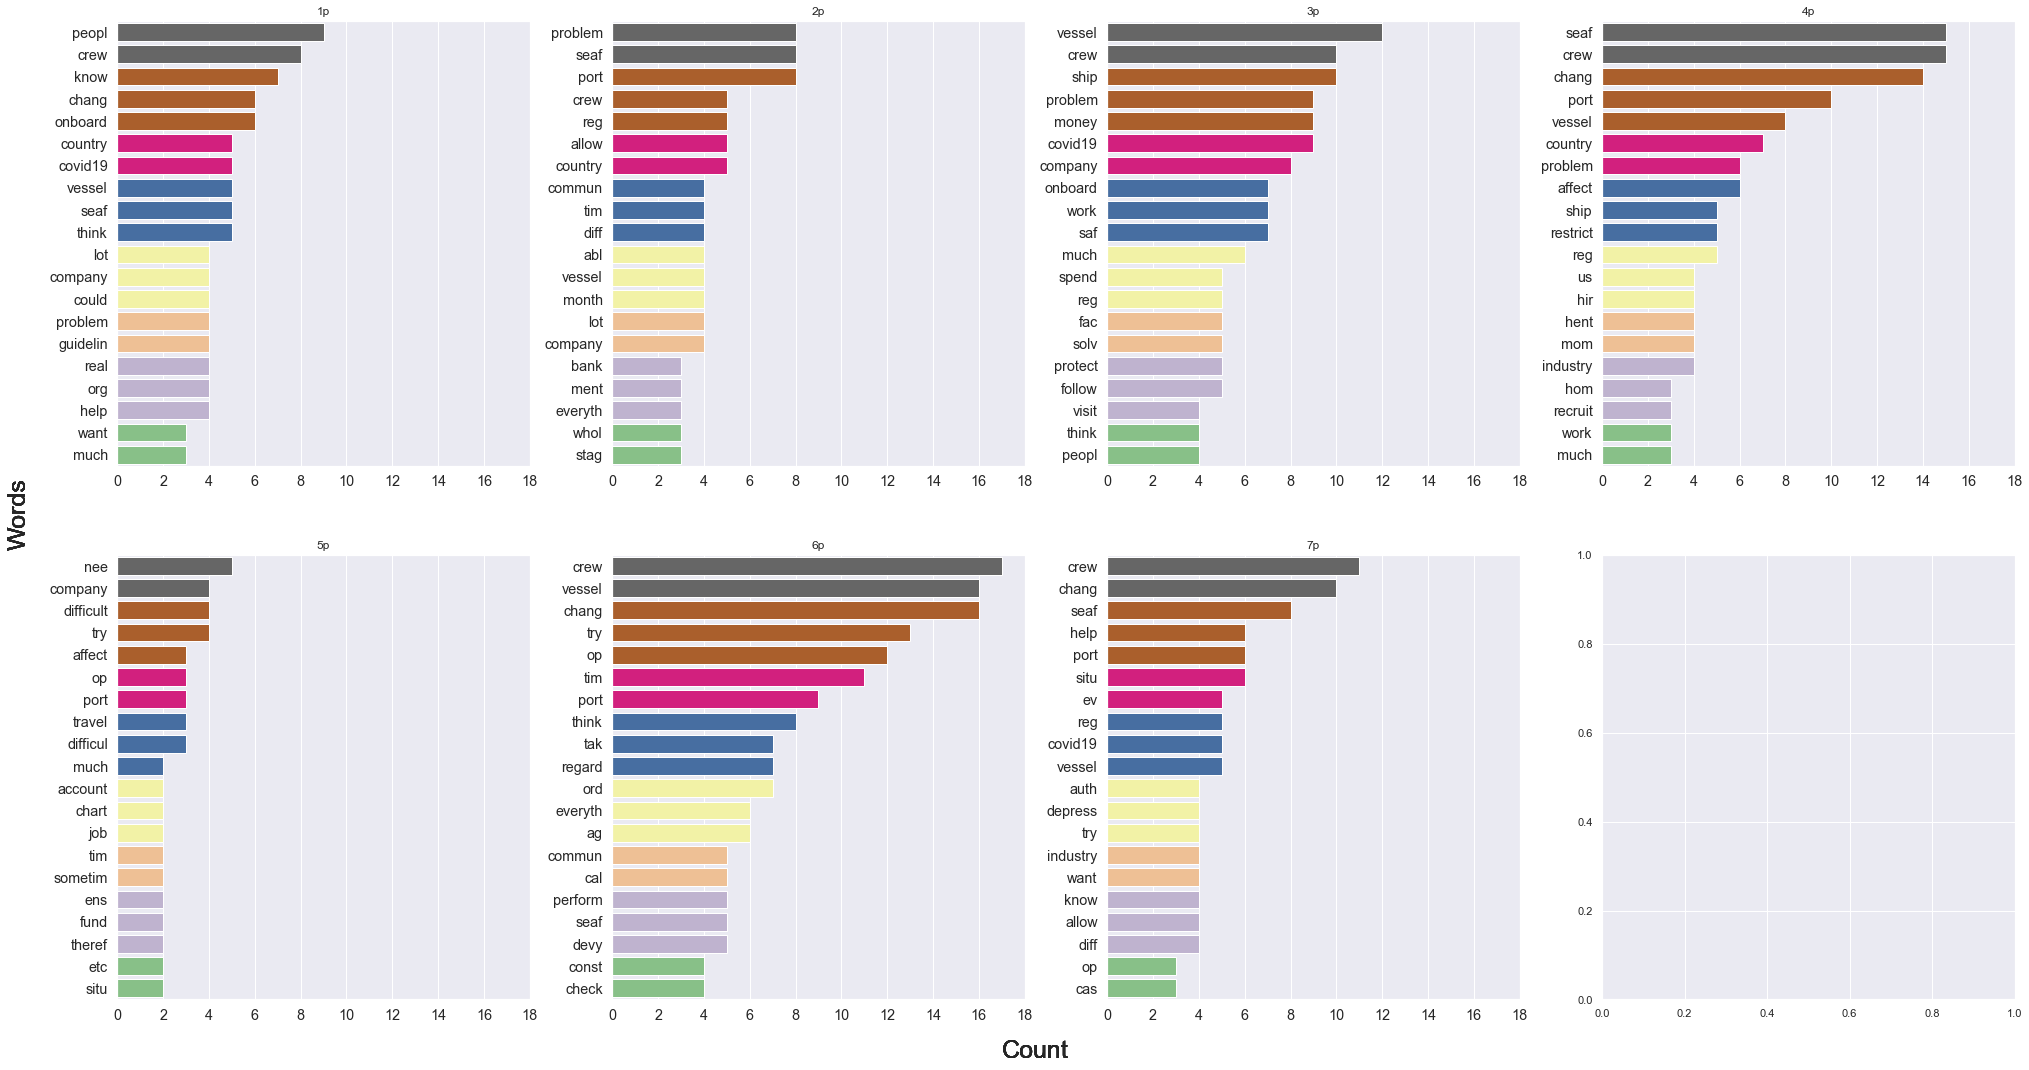

In [119]:
k=0
ticks = [x for x in range(0,20,2)]
fig, axes = plt.subplots(2,4,figsize=(34,18))

for i, ax in zip(range(7,14), axes.flat): 
    s = pd.Series(stemmed_tokenized_q_df.iloc[:,i].sum()).sort_values(ascending=False)[:20]
    sns.barplot(x = s.values, y = s.index,  palette = 'Accent_r', ax=ax)
    ax.tick_params(axis='x', labelsize='large')
    ax.tick_params(axis='y', labelsize='large')
    ax.set_xticks(ticks)
    ax.title.set_text(stemmed_tokenized_q_df.columns[k])
    fig.text(0.5, 0.08, 'Count', ha='center', fontsize=25)
    fig.text(0.08, 0.5, 'Words', va='center', rotation='vertical', fontsize=25)
    k = k+1

### Calculating tf-idf from scratch

#### But whats is Tf-idf ?

**Tf-idf** stands for term frequency - inverse document frequency. Tf-idf is used to evaluate how important a word is to a particular document within a collection of documents. It is based on the notion that if a word appears many times in a particular document, but not used in many other documents, it produces a special meaning to the document it appears. The tf-idf is the product of the term frequency and the inverse document frequency:

$ tf-idf\left(t\right)=tf\left(t\right)\times idf\left(t\right) $

Term frequency is simple how many times a word appears in a document. In our case word counts/ erm frequencies were calculated for each interview, for each answer, for each answer per interview and for all the interviews. The term frequency for each word per interview was calculated, by dividing the appearances of each word of an interview by the total number of words the interview has:

$ tf\left(t\right)=\frac{Number\ of\ times\ term\ t\ appears\ in\ a\ document}{Total\ number\ of\ terms\ in\ the\ document} $

The inverse document frequency, idf, across a set of documents, shows how common a word is in the set of documents. It was calculated for each word per participant based the below formula:

$ idf\left(t\right)=ln\left(\frac{Total\ number\ of\ documents}{Number\ of\ documents\ with\ term\ t\ in\ it}\right) $

In our case the total number of documents equals the total number of interviews, which are 7. The “Number of documents with term $t$ in it” refers in how many documents a particular word $t$ appears. 


In [25]:
word_freq_df = pd.DataFrame(columns = ['word','n','tf','Participant'])

In [26]:
word_freq_df

,word,n,tf,Participant


In [27]:
k = 1
for i in range(7,14):
    doc = pd.Series(stemmed_tokenized_q_df.iloc[:,i].sum(), name='n')
    total_words_doc = doc.sum() # calculates the total words of each participant used
    doc = doc.to_frame() # converts the doc series into a dataframe
    doc.reset_index(level=0, inplace = True) # resets index, the words become a column
    doc.rename(columns={'index':'word'}, inplace = True) # rename the column name of the words from 'index' to 'words'
    doc['Participant'] = k
    doc['tf'] = doc['n'] / total_words_doc # term frequency =  = (Number of times a word appears in a document) / (Total number of words in the document)
    word_freq_df = pd.concat([word_freq_df, doc])
    k = k + 1

In [28]:
word_freq_df = word_freq_df.sort_values(by=['Participant','n'], ascending=False)

In [29]:
word_freq_df

,word,n,tf,Participant
5,crew,11,0.033846,7
6,chang,10,0.030769,7
39,seaf,8,0.024615,7
53,port,6,0.018462,7
70,help,6,0.018462,7
...,...,...,...,...
178,perform,1,0.003086,1
180,way,1,0.003086,1
181,correct,1,0.003086,1
182,inform,1,0.003086,1


In [30]:
# IDF(t) = log_e(Total number of documents / Number of documents with term t in it).
word_freq_df['n_of_docs_with_word_in'] = word_freq_df['word'].apply(lambda term: stemmed_tokenized_q_df.iloc[:,7:14].sum().apply(lambda x : term in x).sum())
# each word in the word_freq_tf is checked if it has been used by other participants 
# tokenized_q_df_no_stop_words.iloc[:,7:14].sum() returns a pandas series of dic types, witht the occurances of words for each participant, so the apply(lambda x : term in x).sum() calculates
# the number of documents each specific term appears in 

In [31]:
word_freq_df['idf'] = np.log(7/word_freq_df['n_of_docs_with_word_in'])

In [32]:
word_freq_df['tf-idf'] = word_freq_df['tf'] * word_freq_df['idf'] 

In [33]:
word_freq_df

,word,n,tf,Participant,n_of_docs_with_word_in,idf,tf-idf
5,crew,11,0.033846,7,7,0.000000,0.000000
6,chang,10,0.030769,7,6,0.154151,0.004743
39,seaf,8,0.024615,7,7,0.000000,0.000000
53,port,6,0.018462,7,6,0.154151,0.002846
70,help,6,0.018462,7,5,0.336472,0.006212
...,...,...,...,...,...,...,...
178,perform,1,0.003086,1,5,0.336472,0.001038
180,way,1,0.003086,1,4,0.559616,0.001727
181,correct,1,0.003086,1,3,0.847298,0.002615
182,inform,1,0.003086,1,5,0.336472,0.001038


In [34]:
word_freq_df_sorted = word_freq_df.sort_values(by=['Participant','tf-idf'], ascending=False)

In [35]:
word_freq_df_sorted.reset_index(level=0, inplace=True)

In [36]:
word_freq_df_sorted.drop('index', axis=1, inplace=True)

In [37]:
word_freq_df_sorted

,word,n,tf,Participant,n_of_docs_with_word_in,idf,tf-idf
0,depress,4,0.012308,7,1,1.945910,0.023950
1,claim,2,0.006154,7,1,1.945910,0.011975
2,top,2,0.006154,7,1,1.945910,0.011975
3,cost,3,0.009231,7,2,1.252763,0.011564
4,want,4,0.012308,7,3,0.847298,0.010428
...,...,...,...,...,...,...,...
1226,allow,2,0.006173,1,7,0.000000,0.000000
1227,ship,2,0.006173,1,7,0.000000,0.000000
1228,us,2,0.006173,1,7,0.000000,0.000000
1229,op,1,0.003086,1,7,0.000000,0.000000


In [38]:
top_tf_idf= word_freq_df_sorted.groupby('Participant').head(5)

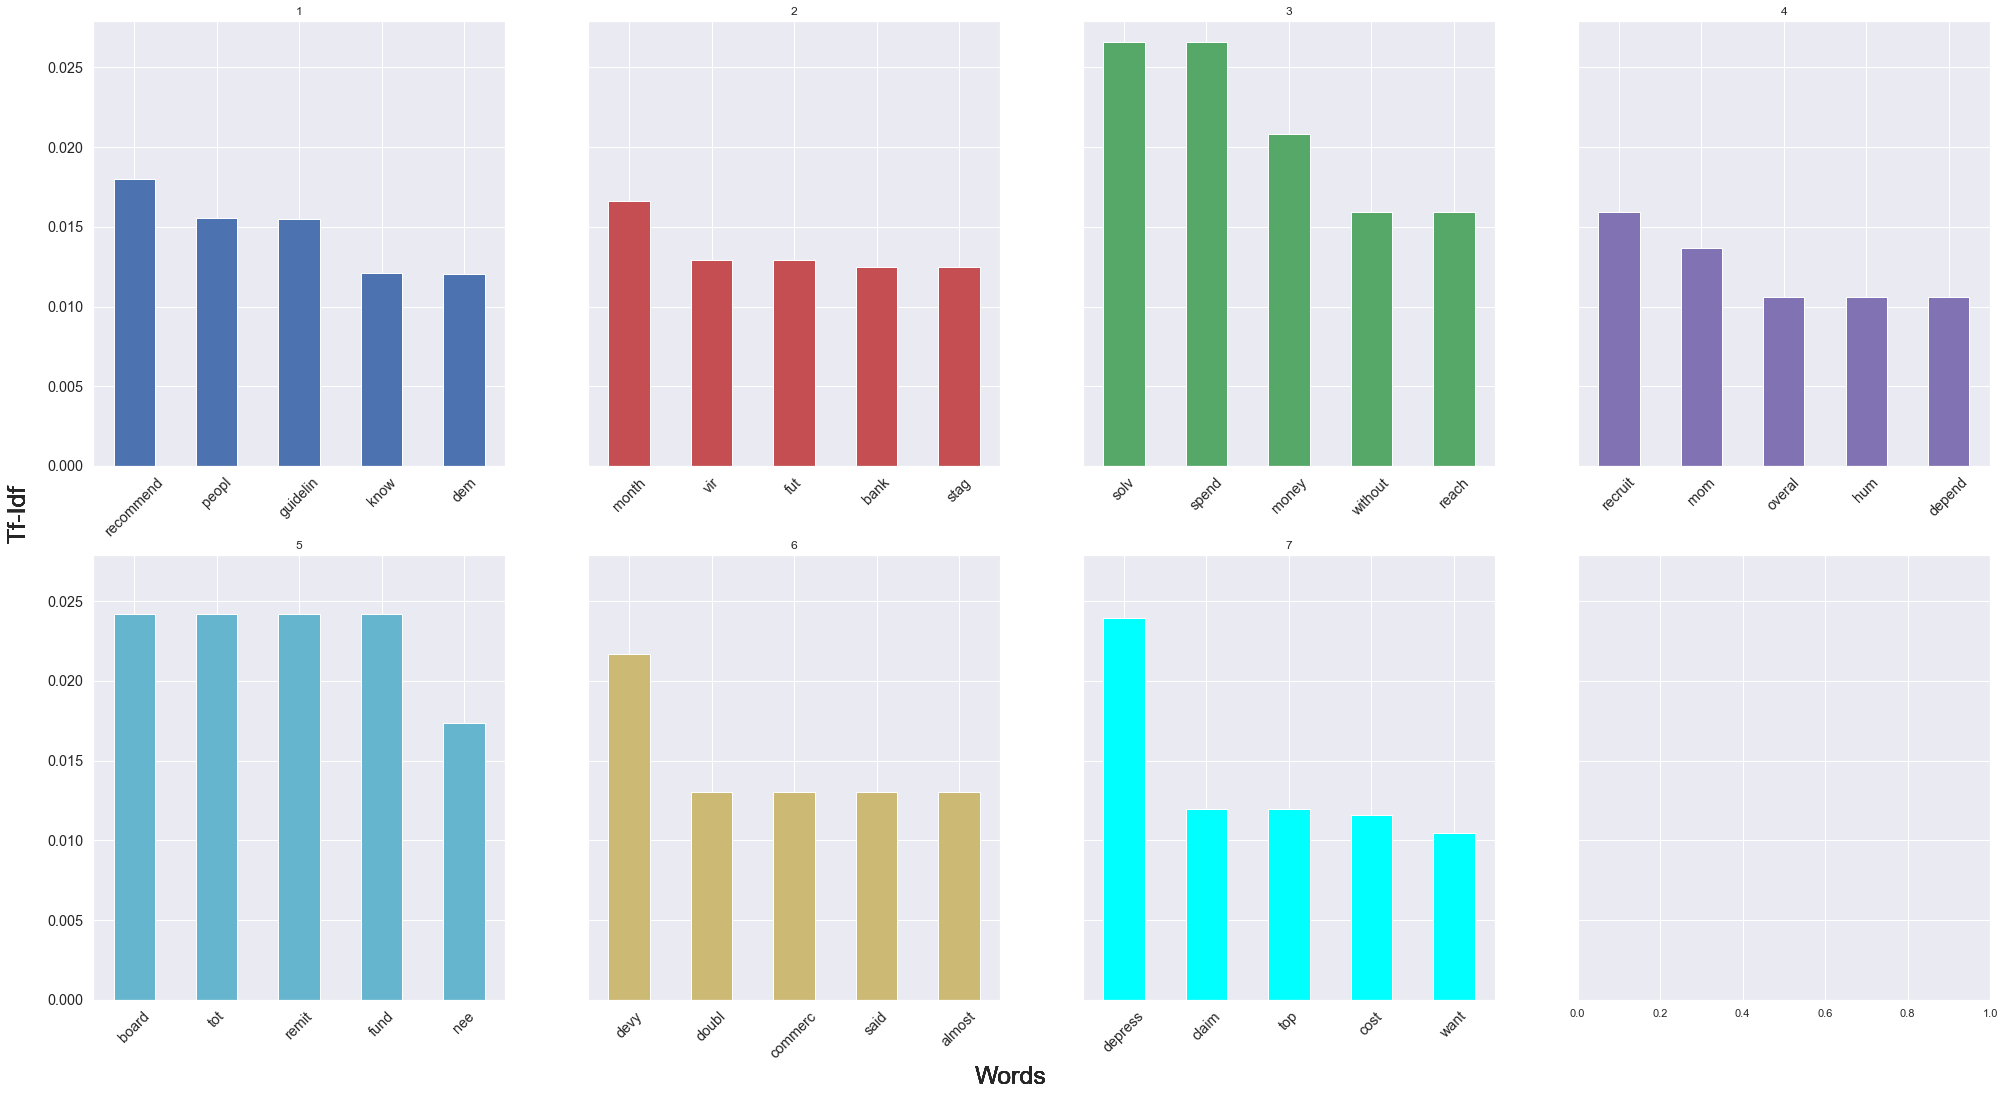

In [117]:
fig, axes = plt.subplots(2,4,figsize=(34,18), sharey=True)
color_list = ['b','r','g','m','c','y','cyan']
k=0
for (participant, group), ax in zip(top_tf_idf.groupby('Participant'), axes.flatten()):
    group.plot(x='word', y='tf-idf', kind='bar', ax=ax, title=participant, color = color_list[k])
    ax.tick_params(axis='x', labelsize='large', labelrotation = 45)
    ax.tick_params(axis='y', labelsize='large')
    ax.get_legend().remove()
    ax.xaxis.label.set_visible(False)
    fig.text(0.5, 0.06, 'Words', ha='center', fontsize=25)
    fig.text(0.09, 0.5, 'Tf-Idf', va='center', rotation='vertical', fontsize=25)
    k=k+1    